**definition**: *Statistics*(broadly) are the mathemtical techniques used to understand data. 

# Describing a Single Dataset

- for *small* datasets, the best description is often the data itself 
- for *large* datasets, statistics enable us to distil the data down to a set of descriptive features.

*approach 1*: visualize the distribution of data with a bar chart / histogram

In [15]:
import random
from collections import Counter
import matplotlib.pyplot as plt

In [43]:
num_friends = [random.choice(range(21)) for _ in range(1000)]
friend_counts = Counter(num_friends)
print(friend_counts)
xs = range(21)
ys = [num_friends[x] for x in friend_counts]

Counter({8: 58, 18: 57, 4: 55, 3: 54, 16: 54, 14: 54, 7: 53, 15: 52, 1: 50, 13: 49, 6: 47, 9: 47, 12: 45, 0: 45, 11: 44, 2: 42, 10: 42, 20: 42, 5: 38, 19: 37, 17: 35})


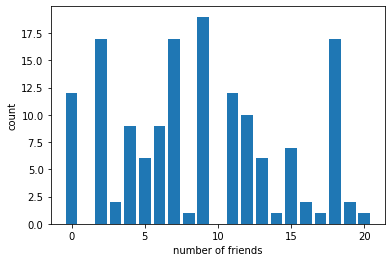

In [20]:
plt.figure() 
plt.bar(xs, ys)
plt.xlabel("number of friends")
plt.ylabel("count")
plt.show()

In [22]:
# some simple descriptive statistics 
num_points = len(num_friends)
largest_value = max(num_friends) 
smallest_value = min(num_friends) 

print(num_points, largest_value, smallest_value)

1000 20 0


In [26]:
# these are easy to do ourself if we sort first
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_largest_value = sorted_values[-2]
print(smalles_value, second_largest_value)

0 20


# Central Tendencies

we can use the mean and median to quantify where the *center* of the data is

In [29]:
def mean(x): 
    return sum(x)/len(x) 

mean(num_friends) # right in the middle as we'd expect for a uniform distribution

9.688

In [34]:
def median(x): 
    X = sorted(x)
    if len(X)%2 != 0:
        return X[len(X)//2]
    else:
        return (X[len(X)//2]+X[len(X)//2-1])/2 # return average between middle points if length is even

median(num_friends)

9.5

the gist is that the mean is easier to compute but also is more sensative to outliers in the data. 

The generalization of the median is the *quantile* which represents the value for which a certain percentage of the dataset lies below. 

In [37]:
def quantile(x, p): 
    """returns the pth-percintile value in x"""
    p_index = int(p*len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.22)

4

finally, the *mode* is the most common value in the dataset. 

In [49]:
def mode(x): 
    """returns a list as there may be more than one mode"""
    counts = Counter(x) 
    max_count = max(counts.values()) 
    print(max_count)
    return [num for (num, count) in counts.items() if count == max_count]

mode(num_friends)

58


[8]

# Dispersion

*Dispersion* refers the statistical measure of the *spread* of a dataset. Typically, values near 0 signify no spread and large values mean very spread out. 

In [52]:
def data_range(x): 
    return max(x)-min(x) 

data_range(num_friends)

20

a more complicated measure is the *variance*, i.e. the average (squared) distance from the mean. 

In [53]:
def variance(x): 
    mu = mean(x) 
    return sum([(x_i-mu)**2 for x_i in x ])/(len(x)-1)

variance(num_friends)

35.6787977977978

note that the `len(x)-1` in the denominator is to account for error due to the mean only being approximate if we are sampling. For large samples this makes little difference. 

In [56]:
import math

def standard_deviation(x): 
    return math.sqrt(variance(x))

standard_deviation(num_friends)

5.973173176612059

# Correlation